In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Í≤ΩÍ≥†(W) Î©îÏãúÏßÄÎßå Ïà®ÍπÄ

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

# GPU Î©îÎ™®Î¶¨ ÎèôÏ†Å Ìï†Îãπ ÏÑ§Ï†ï
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU Î©îÎ™®Î¶¨ ÎèôÏ†Å Ìï†Îãπ ÌôúÏÑ±Ìôî ÏôÑÎ£å")
    except RuntimeError as e:
        print(e)

GPU Î©îÎ™®Î¶¨ ÎèôÏ†Å Ìï†Îãπ ÌôúÏÑ±Ìôî ÏôÑÎ£å


In [3]:
tf.config.set_visible_devices([], 'GPU')

In [24]:
import pandas as pd

# KOTE Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
train_df = pd.read_csv("KOTE/train.tsv", sep='\t')
test_df = pd.read_csv("KOTE/test.tsv", sep='\t')
val_df = pd.read_csv("KOTE/val.tsv", sep='\t')

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train_df.shape}")
print(f"Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test_df.shape}")
print(f"Validation Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {val_df.shape}")

# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ï∂úÎ†•
train_df.head()

Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (39999, 3)
Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (4999, 3)
Validation Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (4999, 3)


39087              ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§... Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§.  \
0  30893  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù, Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî...   
1  45278  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë, Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàò...   
2  16398       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
3  13653                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé   
4  13748                  Ïñ¥Î¶¥ Îïå ÌñàÎçò Í±¥Îç∞ ÏïÑÏßÅÎèÑ Î≥º ÎïåÎßàÎã§ Îí§ÌÜµÏàò ÏñºÏñºÌï® „Öã„Öã„Öã„Öã   

                     2,13,15,16,29,39  
0          0,5,7,10,19,22,29,35,36,38  
1                               1,2,7  
2                 9,15,20,23,26,28,29  
3  1,2,8,9,11,13,15,16,28,29,32,40,42  
4                 2,15,23,24,25,28,33

In [25]:
import pandas as pd

# Ïò¨Î∞îÎ•∏ Ïª¨ÎüºÎ™Ö ÏßÄÏ†ï ÌõÑ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_df = pd.read_csv("KOTE/train.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)
test_df = pd.read_csv("KOTE/test.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)
val_df = pd.read_csv("KOTE/val.tsv", sep='\t', names=['id', 'comments', 'labels'], header=None)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(train_df.head())
print("üìå Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î™©Î°ù:", train_df.columns)

      id                                           comments  \
0  39087              ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§... Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§.   
1  30893  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù, Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî...   
2  45278  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë, Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàò...   
3  16398       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
4  13653                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé   

                               labels  
0                    2,13,15,16,29,39  
1          0,5,7,10,19,22,29,35,36,38  
2                               1,2,7  
3                 9,15,20,23,26,28,29  
4  1,2,8,9,11,13,15,16,28,29,32,40,42  
üìå Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î™©Î°ù: Index(['id', 'comments', 'labels'], dtype='object')


In [26]:
import re

# ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®Ïàò (Ïà´Ïûê Ïú†ÏßÄ)
def clean_text(text):
    text = re.sub(r"[^Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£0-9\s]", "", text)  # ÌïúÍ∏Ä, Ïà´Ïûê, Í≥µÎ∞± Ï†úÏô∏Ìïú Î¨∏Ïûê Ï†úÍ±∞
    text = re.sub(r"\s+", " ", text).strip()  # Ïó∞ÏÜçÎêú Í≥µÎ∞± Ï†úÍ±∞
    return text

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Ï†ÅÏö©
train_df['clean_text'] = train_df['comments'].apply(clean_text)
test_df['clean_text'] = test_df['comments'].apply(clean_text)
val_df['clean_text'] = val_df['comments'].apply(clean_text)

# Í≤∞Í≥º ÌôïÏù∏
train_df[['comments', 'clean_text']].head(10)

comments  \
0              ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§... Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§.   
1  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù, Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî...   
2  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë, Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàò...   
3       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
4                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé   
5                  Ïñ¥Î¶¥ Îïå ÌñàÎçò Í±¥Îç∞ ÏïÑÏßÅÎèÑ Î≥º ÎïåÎßàÎã§ Îí§ÌÜµÏàò ÏñºÏñºÌï® „Öã„Öã„Öã„Öã   
6  Î¨ºÍ∞àÏù¥ÏïΩ Íµ¨Îß§ÌñàÏñ¥Ïöî...ÎØ∏ÎØ∏ÎÑ§ÏóêÏÑú ÏàòÏ°∞2Í∞úÎûë Ïó¨Îü¨Í∞ÄÏßÄ Ïö©ÌíàÏÇ¨Î©¥ÏÑú 3~4Î≤à Ï£ºÎ¨∏ÌñàÏóàÎäî...   
7  Ïã≠ÏùºÏ°∞Îäî Í≤®Ïö∞60Ïù∏Îç∞? ÎÇòÎ®∏ÏßÄ Îã§ Ïñ¥ÎîîÍ∞ê? ÌòπÏãú ÏóÑÎßàÏïÑÎπ† Í∑∏ÎûúÏ†∏Îî∞Î°úÌÉÄÍ≥†, Ïô∏ÏãùÏûêÏ£ºÌïò...   
8                         90ÎÖÑ Ï§òÏïº ÌïòÎäîÍ±∞ ÏïÑÎãåÍ∞Ä?  Ïì∞Î†àÍ∏∞Í∞ôÏùÄ Í≤ÉÎì§.   
9                             ÏïÑÏ£º Î∂ÄÏ∞©ÏÑ±ÎèÑ Ï¢ãÍ≥† Ìö®Í≥º 100Ï†ê ÏûÖÎãàÎã§   

                                          clean_text  
0                  ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§ Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§  
1  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî ...  
2  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàòÌï®...  
3       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã  
4                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé  
5                  Ïñ¥Î¶¥ Îïå ÌñàÎçò Í±¥Îç∞ ÏïÑÏßÅÎèÑ Î≥º ÎïåÎßàÎã§ Îí§ÌÜµÏàò ÏñºÏñºÌï® „Öã„Öã„Öã„Öã  
6  Î¨ºÍ∞àÏù¥ÏïΩ Íµ¨Îß§ÌñàÏñ¥ÏöîÎØ∏ÎØ∏ÎÑ§ÏóêÏÑú ÏàòÏ°∞2Í∞úÎûë Ïó¨Îü¨Í∞ÄÏßÄ Ïö©ÌíàÏÇ¨Î©¥ÏÑú 34Î≤à Ï£ºÎ¨∏ÌñàÏóàÎäîÎç∞ Í∑∏ ...  
7  Ïã≠ÏùºÏ°∞Îäî Í≤®Ïö∞60Ïù∏Îç∞ ÎÇòÎ®∏ÏßÄ Îã§ Ïñ¥ÎîîÍ∞ê ÌòπÏãú ÏóÑÎßàÏïÑÎπ† Í∑∏ÎûúÏ†∏Îî∞Î°úÌÉÄÍ≥† Ïô∏ÏãùÏûêÏ£ºÌïòÎäîÍ±∞ÏïÑ...  
8                            90ÎÖÑ Ï§òÏïº ÌïòÎäîÍ±∞ ÏïÑÎãåÍ∞Ä Ïì∞Î†àÍ∏∞Í∞ôÏùÄ Í≤ÉÎì§  
9                             ÏïÑÏ£º Î∂ÄÏ∞©ÏÑ±ÎèÑ Ï¢ãÍ≥† Ìö®Í≥º 100Ï†ê ÏûÖÎãàÎã§

In [27]:
# ‚úÖ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
train_texts = train_df['clean_text'].tolist()
test_texts = test_df['clean_text'].tolist()
val_texts = val_df['clean_text'].tolist()

In [8]:
# Í∞êÏ†ï ÎùºÎ≤® Í∞úÏàò ÌôïÏù∏
print(train_df['labels'].value_counts())

labels
0,6,10,22,23,33                       125
0,6,10,12,22,23,33                    108
24                                     83
2,28,40,42                             65
0,10,22,37                             55
                                     ... 
0,3,10,12,20,21,22,23,24,27,31,35       1
0,5,10,19,20,22,25,27,31,36,38          1
0,2,3,8,20,22,23,24,28,29,32,33,39      1
1,11,14,15,16,27,29,38,39,41            1
2,9,10,15,18,23,33,35,39                1
Name: count, Length: 29332, dtype: int64


In [28]:
import pandas as pd
from collections import Counter

# Í∞êÏ†ïÏùÑ 7Í∞ú Í∑∏Î£πÏúºÎ°ú Ï†ïÎ¶¨ÌïòÎäî Îß§Ìïë (KOTEÏùò 44Í∞ú Í∞êÏ†ïÏùÑ 7Í∞ú Í∞êÏ†ï Í∑∏Î£πÏúºÎ°ú Î≥ÄÌôò)
emotion_mapping = {
    'Í∏∞ÏÅ®': [42, 40, 28],  # Í∏∞ÏÅ®, ÌñâÎ≥µ, Ï¶êÍ±∞ÏõÄ/Ïã†ÎÇ®
    'Ïä¨Ìîî': [5, 19, 25, 36],  # Ïä¨Ìîî, Ï†àÎßù, Ìå®Î∞∞/ÏûêÍ∏∞ÌòêÏò§, ÏÑúÎü¨ÏõÄ
    'ÎÜÄÎûå': [39, 34, 15, 2],  # ÎÜÄÎûå, Í≤ΩÏïÖ, Ïã†Í∏∞Ìï®/Í¥ÄÏã¨, Í∞êÎèô/Í∞êÌÉÑ
    'Î∂ÑÎÖ∏': [6, 22, 0],  # ÌôîÎÇ®/Î∂ÑÎÖ∏, ÏßúÏ¶ù, Î∂àÌèâ/Î∂àÎßå
    'Í≥µÌè¨': [18, 41],  # Í≥µÌè¨/Î¨¥ÏÑúÏõÄ, Î∂àÏïà/Í±±Ï†ï
    'ÌòêÏò§': [31, 21],  # Ï¶ùÏò§/ÌòêÏò§, Ïó≠Í≤®ÏõÄ/ÏßïÍ∑∏Îü¨ÏõÄ
    'Ï§ëÎ¶Ω': [24, 14, 43]  # ÏóÜÏùå, Ìé∏Ïïà/ÏæåÏ†Å, ÏïàÏã¨/Ïã†Î¢∞
}

# FER2013 Í∏∞Ï§Ä Í∞êÏ†ï ÎùºÎ≤®Î°ú Î≥ÄÌôò
fer2013_label_mapping = {
    'Í∏∞ÏÅ®': 3,  # Happy
    'Ïä¨Ìîî': 5,  # Sad 
    'ÎÜÄÎûå': 6,  # Surprise
    'Î∂ÑÎÖ∏': 0,  # Angry
    'Í≥µÌè¨': 2,  # Fear
    'ÌòêÏò§': 1,  # Disgust
    'Ï§ëÎ¶Ω': 4   # Neutral
}

# Í∞êÏ†ï Í∑∏Î£πÏùÑ FER2013 Í∏∞Ï§ÄÏúºÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò
def map_to_fer2013(label_str):
    if pd.isna(label_str) or label_str == '':
        return 4  # FER2013 Í∏∞Ï§Ä Ï§ëÎ¶Ω

    label_list = list(map(int, label_str.split(',')))
    matched_fer_labels = []

    for num in label_list:
        for kotem, kote_ids in emotion_mapping.items():
            if num in kote_ids:
                matched_fer_labels.append(fer2013_label_mapping[kotem])

    if not matched_fer_labels:
        return 4  # ÏïÑÎ¨¥Í≤ÉÎèÑ Îß§ÌïëÎêòÏßÄ ÏïäÏúºÎ©¥ Ï§ëÎ¶Ω

    # Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú FER2013 Í∞êÏ†ïÏùÑ ÏÑ†ÌÉù
    return Counter(matched_fer_labels).most_common(1)[0][0]

# Í∞êÏ†ï ÎùºÎ≤® Î≥ÄÌôò Ï†ÅÏö© (NaN Í∞í Ï≤òÎ¶¨ Ï∂îÍ∞Ä)
train_df['fer2013_emotion_grouped'] = train_df['labels'].fillna('').apply(map_to_fer2013)
test_df['fer2013_emotion_grouped'] = test_df['labels'].fillna('').apply(map_to_fer2013)
val_df['fer2013_emotion_grouped'] = val_df['labels'].fillna('').apply(map_to_fer2013)

# Î≥ÄÌôòÎêú Í∞êÏ†ï Í∞úÏàò ÌôïÏù∏
print(train_df['fer2013_emotion_grouped'].value_counts())

fer2013_emotion_grouped
0    16762
6     8879
3     6499
4     4150
5     2588
2      776
1      346
Name: count, dtype: int64


In [29]:
# ‚úÖ Í∞êÏ†ï ÎùºÎ≤® (FER2013 Îß§ÌïëÎêú ÎùºÎ≤®)
train_labels = train_df['fer2013_emotion_grouped'].values
test_labels = test_df['fer2013_emotion_grouped'].values
val_labels = val_df['fer2013_emotion_grouped'].values

# Î≥ÄÌôòÎêú ÎùºÎ≤® ÌôïÏù∏
print("ÎùºÎ≤® Î≥ÄÌôò Í≤∞Í≥º:", train_labels[:5])

ÎùºÎ≤® Î≥ÄÌôò Í≤∞Í≥º: [6 5 6 6 3]


In [30]:
!mecab -D

filename:	/opt/homebrew/lib/mecab/dic/mecab-ko-dic/sys.dic
version:	102
charset:	UTF-8
type:	0
size:	816283
left size:	3822
right size:	2693



In [31]:
import os
os.environ["MECABRC"] = "/opt/homebrew/etc/mecabrc"

In [32]:
from konlpy.tag import Mecab

# Î≤ÑÏ†Ñ ÎπÑÏùòÏ°¥Ï†Å Í≤ΩÎ°ú ÏÇ¨Ïö©
mecab = Mecab(dicpath='/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

print(mecab.morphs("Ïù¥ Î¨∏Ïû•ÏùÄ ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÌÖåÏä§Ìä∏ÌïòÎäî Î¨∏Ïû•ÏûÖÎãàÎã§."))

['Ïù¥', 'Î¨∏Ïû•', 'ÏùÄ', 'ÌòïÌÉúÏÜå', 'Î∂ÑÏÑù', 'ÏùÑ', 'ÌÖåÏä§Ìä∏', 'Ìïò', 'Îäî', 'Î¨∏Ïû•', 'ÏûÖÎãàÎã§', '.']


In [33]:
from konlpy.tag import Mecab

mecab = Mecab(dicpath='/opt/homebrew/Cellar/mecab-ko-dic/2.1.1-20180720/lib/mecab/dic/mecab-ko-dic')

# ÌÜ†ÌÅ∞Ìôî Ìï®Ïàò
def tokenize(text):
    return mecab.morphs(text)

# ÌÜ†ÌÅ∞Ìôî Ï†ÅÏö©
train_df['tokenized'] = train_df['clean_text'].apply(tokenize)
test_df['tokenized'] = test_df['clean_text'].apply(tokenize)
val_df['tokenized'] = val_df['clean_text'].apply(tokenize)

# Í≤∞Í≥º ÌôïÏù∏
print(train_df[['clean_text', 'tokenized']].head())

                                          clean_text  \
0                  ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§ Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§   
1  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî ...   
2  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàòÌï®...   
3       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
4                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé   

                                           tokenized  
0  [ÎÇ¥, Í∞Ä, ÌÜ∞ÌñâÌÅ¨Ïä§, Î•º, Ï¢ãÏïÑÌïò, Í∏¥, Ìñà, ÎÇò, Î≥¥Îã§, Ï¥àÍ∏∞, ÏòÅÌôî, Îπº, Í≥†...  
1  [Ï†ïÎßê, ÏÉÅÏÉÅ, ÏùÑ, Ï¥àÏõî, Ìïò, Îäî, Î¨¥, Í∞úÎÖê, ÏßÑÏÉÅ, Îì§, ÏÉÅÎåÄ, Ìïò, Îã§, ...  
2  [ÏÉàÎ°úÏö¥, ÏÑ∏ÏÉÅ, Í≥º, Ï°∞Ïö∞, Ìïú, Ïûê, Ïùò, Ïñ¥Î¶∞ÏïÑÏù¥, Í∞ô, ÏùÄ, Î∞òÏùë, Ïñ¥Ï©åÎ©¥,...  
3  [ÎØ∏Ïó≠, ÏùÄ, Ïõ

In [34]:
# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
stopwords = [
    "Ïùò", "Í∞Ä", "Ïù¥", "ÏùÄ", "Îì§", "Îäî", "Í±ç", "Í≥º",
    "Î•º", "ÏúºÎ°ú", "Ïûê", "Ïóê", "ÏôÄ", "Ìïú", "ÌïòÎã§", "ÏóêÏÑú",
    "Ïöî", "Î¨¥Ïóá", "Ïñ¥Îîî", "ÌïòÎ©¥", "Ïù¥Îã§"
]

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ï†ÅÏö©
train_df['tokenized'] = train_df['tokenized'].apply(remove_stopwords)
test_df['tokenized'] = test_df['tokenized'].apply(remove_stopwords)
val_df['tokenized'] = val_df['tokenized'].apply(remove_stopwords)

# Í≤∞Í≥º ÌôïÏù∏
print(train_df[['clean_text', 'tokenized']].head())

                                          clean_text  \
0                  ÎÇ¥Í∞Ä ÌÜ∞ÌñâÌÅ¨Ïä§Î•º Ï¢ãÏïÑÌïòÍ∏¥ ÌñàÎÇòÎ≥¥Îã§ Ï¥àÍ∏∞ ÏòÅÌôî ÎπºÍ≥†Îäî Îã§ Î¥§ÎÑ§   
1  Ï†ïÎßê ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÎäî Î¨¥Í∞úÎÖê ÏßÑÏÉÅÎì§ ÏÉÅÎåÄÌïòÎã§ Ïö∞Ïö∏Ï¶ù Í≥µÌï≠Ïû•Ïï† Í±∏Î¶¨Îäî Í≥µÎ¨¥Ïõê ÎßéÏïÑÏöî ...   
2  ÏÉàÎ°úÏö¥ ÏÑ∏ÏÉÅÍ≥º Ï°∞Ïö∞Ìïú ÏûêÏùò Ïñ¥Î¶∞ÏïÑÏù¥ Í∞ôÏùÄ Î∞òÏùë Ïñ¥Ï©åÎ©¥ ÌöåÎ≥µÎêú Í≤ÉÏùÄ ÎààÏù¥ ÏïÑÎãå ÏàúÏàòÌï®...   
3       ÎØ∏Ïó≠ÏùÄ ÏõêÏÉùÏÉùÎ¨ºÍ≥Ñ ÏÇ∞Ìò∏Ï¥àÎäî ÎèôÎ¨º„Öá„Öá ÏïÑ ÎØ∏Ïó≠Ïù¥ Î∞îÎã§Ïùò ÏÉà„Ñ±„Öá„Ñ±„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   
4                        ÎÑ§ ÎßûÏäµÎãàÎã§ ÌîåÏä§Îäî Ïó≠Ïãú 30ÌîÑÎ†àÏûÑÏù¥ Ïñ¥Ïö∏Î¶¨Ï£† „Öé   

                                           tokenized  
0  [ÎÇ¥, ÌÜ∞ÌñâÌÅ¨Ïä§, Ï¢ãÏïÑÌïò, Í∏¥, Ìñà, ÎÇò, Î≥¥Îã§, Ï¥àÍ∏∞, ÏòÅÌôî, Îπº, Í≥†, Îã§, Î¥§...  
1  [Ï†ïÎßê, ÏÉÅÏÉÅ, ÏùÑ, Ï¥àÏõî, Ìïò, Î¨¥, Í∞úÎÖê, ÏßÑÏÉÅ, ÏÉÅÎåÄ, Ìïò, Îã§, Ïö∞Ïö∏Ï¶ù, Í≥µ...  
2  [ÏÉàÎ°úÏö¥, ÏÑ∏ÏÉÅ, Ï°∞Ïö∞, Ïñ¥Î¶∞ÏïÑÏù¥, Í∞ô, Î∞òÏùë, Ïñ¥Ï©åÎ©¥, ÌöåÎ≥µ, Îêú, Í≤É, Îàà, ÏïÑ...  
3  [ÎØ∏Ïó≠, Ï

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_texts = train_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()
test_texts = test_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()
val_texts = val_df['tokenized'].apply(lambda x: ' '.join(x)).tolist()

# Îã®Ïñ¥ ÏÇ¨Ï†Ñ ÏÉùÏÑ±
tokenizer = Tokenizer(oov_token="<OOV>",
                      filters=''
                     )
custom_tokens = [
    "„Öã„Öã„Öã", "„Öé„Öé„Öé", "„Ö†„Ö†", "„Öú„Öú", "„Ö°„Ö°", "Ìóê", "Ìóâ", "„Ñ∑„Ñ∑", "ÎåÄÎ∞ï",
    "„Ñπ„Öá", "„Ñ¥„Ñ¥", "„Öá„Öá", "„Öá„Öã", "„Ñ±„Ñ±", "„Ñ±„ÖÖ", "„Öä„Öã", "„ÖÖ„Ñ±", "„Öé„Öá", "„ÖÇ„Öá", "„Öá„Öà",
    "ÎÖ∏Ïûº", "ÍøÄÏûº", "Í∞ëÎ∂ÑÏã∏", "ÏûºÎØºÏù¥", "ÌòÑÏõÉ", "ÎßåÎ†ô", "Ïñ¥Í∑∏Î°ú", "Î∂àÍ∏à", "„Ñπ„Öà„Ñ∑", "Ï©êÎã§", "Ï°¥Îßõ", "ÏÜîÍπå", "Í∑πÌòê",
    "„ÖÖ„ÖÇ", "„Öà„Ñπ", "„ÖÑ", "Ï°¥ÎÇò"
]
tokenizer.fit_on_texts(train_texts + [" ".join(custom_tokens)])

# ‚úÖ Ïù¥Ï†ú VOCAB_SIZE ÏÑ§Ï†ï (Ï†ïÌôïÌïú ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞ Í∏∞Î∞ò)
MAX_VOCAB_SIZE = len(tokenizer.word_index) + 1

# Îã®Ïñ¥Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# ‚úÖ ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Ìôî Î∞è Ìå®Îî©
MAX_SEQUENCE_LENGTH = max(len(seq) for seq in train_sequences)

# ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏÑ§Ï†ï (Ìå®Îî©)
train_padded = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# ‚úÖ TensorFlow Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò
BATCH_SIZE = 64

train_text_ds = tf.data.Dataset.from_tensor_slices((train_padded, train_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)
test_text_ds = tf.data.Dataset.from_tensor_slices((test_padded, test_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)
val_text_ds = tf.data.Dataset.from_tensor_slices((val_padded, val_labels)).batch(BATCH_SIZE,drop_remainder=False).prefetch(tf.data.AUTOTUNE)

# Í≤∞Í≥º ÌôïÏù∏
print("Ìå®Îî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", train_padded.shape)
print("‚úÖ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ ÏôÑÎ£å!")

Ìå®Îî© ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (40000, 188)
‚úÖ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ ÏôÑÎ£å!


In [36]:
import numpy as np

# ÎÑòÌååÏù¥ Î∞∞Ïó¥ Î≥ÄÌôò 
X_train, y_train = np.array(train_padded), np.array(train_labels)
X_val, y_val = np.array(val_padded), np.array(val_labels)
X_test, y_test = np.array(test_padded), np.array(test_labels)

print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_train.shape, y_train.shape) 
print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_val.shape, y_val.shape)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_test.shape, y_test.shape)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (40000, 188) (40000,)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (5000, 188) (5000,)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (5000, 188) (5000,)


In [37]:
# ‚úÖ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
text_train_count = sum(1 for _ in train_text_ds)
text_val_count = sum(1 for _ in val_text_ds)
text_test_count = sum(1 for _ in test_text_ds)

print(f"üìù ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò - Train: {text_train_count}, Validation: {text_val_count}, Test: {text_test_count}")

üìù ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò - Train: 625, Validation: 79, Test: 79


In [38]:
for x, y in train_text_ds.take(1):
    print("ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:", x.shape)
    print("ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:", y.shape)

ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (64, 188)
ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (64,)


In [39]:
from tensorflow.keras.layers import Layer, Dense, Dropout
import tensorflow.keras.backend as K
import tensorflow as tf

class AttentionLayer(Layer):
    def __init__(self, dropout_rate=0.1, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.dropout = Dropout(dropout_rate)

    def build(self, input_shape):
        self.W = Dense(input_shape[-1], activation='tanh')
        self.V = Dense(1)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, mask=None):
        # (batch, time, 1)
        score = self.V(self.W(inputs))

        # ‚úÖ ÎßàÏä§ÌÇπ Ï†ÅÏö© (Ìå®Îî©Îêú Î∂ÄÎ∂ÑÏùÑ attentionÏóêÏÑú Ï†úÏô∏)
        if mask is not None:
            mask = tf.cast(mask, tf.float32)          # (batch, time)
            mask = tf.expand_dims(mask, axis=-1)      # (batch, time, 1)
            score -= (1.0 - mask) * 1e9                # Îß§Ïö∞ ÏûëÏùÄ Í∞íÏúºÎ°ú ÏñµÏ†ú

        attention_weights = K.softmax(score, axis=1)  # (batch, time, 1)
        attention_weights = self.dropout(attention_weights)  # ‚úÖ ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)  # (batch, features)
        return context_vector

    def compute_mask(self, inputs, mask=None):
        return None  # Ï∂úÎ†•ÏóêÎäî ÎßàÏä§ÌÅ¨ Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùå

In [40]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∏∞Î≥∏ ÏÑ§Ï†ï
MAX_VOCAB_SIZE = len(tokenizer.word_index) + 1   # Ïñ¥Ìúò ÏÇ¨Ï†Ñ ÌÅ¨Í∏∞
EMBEDDING_DIM = 300       # Ï§ÑÏù∏ ÏûÑÎ≤†Îî© Ï∞®Ïõê
MAX_SEQUENCE_LENGTH = 98 # Î¨∏Ïû• ÏµúÎåÄ Í∏∏Ïù¥

# 1. Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò (Í∞ÑÏÜåÌôîÎêú CNN + Bi-LSTM Íµ¨Ï°∞)
def create_model(num_filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3, learning_rate=0.00023853):
    model = Sequential()
    # ÏûÖÎ†• Î™®Ïñë Î™ÖÏãú
    model.add(Input(shape=(MAX_SEQUENCE_LENGTH,)))
    # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥ (input_length Ï†úÍ±∞)
    model.add(Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True))
    
    # CNN Î†àÏù¥Ïñ¥: ÌïÑÌÑ∞ ÏàòÎ•º 32Î°ú Ï§ÑÏûÑ
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(BatchNormalization())
    
    # Îã®Ïùº Bidirectional LSTM Î†àÏù¥Ïñ¥ ÏÇ¨Ïö© (Ï∂úÎ†• ÏãúÌÄÄÏä§ ÎåÄÏã† ÏµúÏ¢Ö Ï∂úÎ†•Îßå ÏÇ¨Ïö©)
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))

    #üîëAttention Î©îÏª§ÎãàÏ¶ò Ï∂îÍ∞Ä
    model.add(AttentionLayer())

    # ‚úÖ AttentionLayer Ï†úÍ±∞ Ïãú Ï≤òÎ¶¨ ÌïÑÏöî
    #model.add(tf.keras.layers.GlobalAveragePooling1D())  # üîë ÏãúÌÄÄÏä§ Ï†úÍ±∞ (Ï§ëÏöî)
    
    # ÎìúÎ°≠ÏïÑÏõÉ Î∞è Dense Î†àÏù¥Ïñ¥
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))  # 7Í∞úÏùò Í∞êÏ†ï ÌÅ¥ÎûòÏä§

    # ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï (Adam)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0) # clipnorm Ï∂îÍ∞Ä (accuracy Í∏âÎùΩ Î∞©ÏßÄ)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ÏòàÏãúÎ°ú Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏöîÏïΩ Ï∂úÎ†•
model = create_model(num_filters=64, kernel_size=3, lstm_units=128, dropout_rate=0.3,
                     learning_rate=0.00023853)
model.summary()

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_1 (Embedding)         ‚îÇ (None, 98, 300)        ‚îÇ    12,642,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_1 (Conv1D)               ‚îÇ (None, 98, 64)         ‚îÇ        57,664 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 98, 64)         ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional) ‚îÇ (None, 98, 256)        ‚îÇ       197,632 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ attention_layer_1               ‚îÇ (None, 256)            ‚îÇ        66,049 ‚îÇ
‚îÇ (AttentionLayer)                ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 64)             ‚îÇ        16,448 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 7)              ‚îÇ           455 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 12,980,504 (49.52 MB)

 Trainable params: 12,980,376 (49.52 MB)

 Non-trainable params: 128 (512.00 B)

/var/folders/c1/ff1kv08j2fd06b_058sckl9w0000gn/T/ipykernel_12265/1084822427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette='Blues_d')
/var/folders/c1/ff1kv08j2fd06b_058sckl9w0000gn/T/ipykernel_12265/1084822427.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


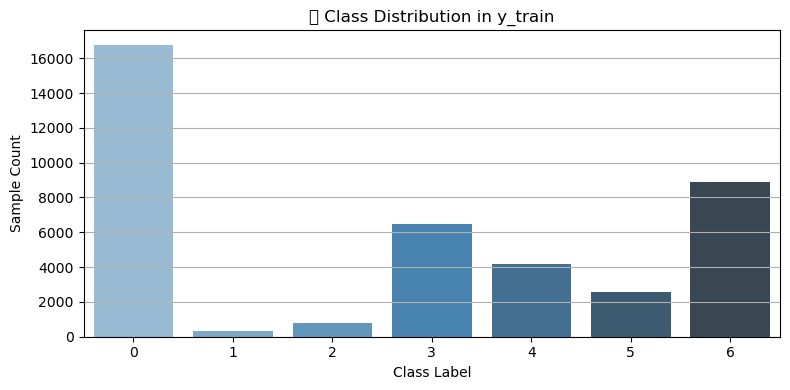

Class 0: 16762Í∞ú (41.91%)
Class 1: 346Í∞ú (0.86%)
Class 2: 776Í∞ú (1.94%)
Class 3: 6499Í∞ú (16.25%)
Class 4: 4150Í∞ú (10.38%)
Class 5: 2588Í∞ú (6.47%)
Class 6: 8879Í∞ú (22.20%)


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
unique_classes, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=unique_classes, y=counts, palette='Blues_d')
plt.title("üîç Class Distribution in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.xticks(unique_classes)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# ÌÅ¥ÎûòÏä§Î≥Ñ ÎπÑÏú® Ï∂úÎ†•
for label, count in zip(unique_classes, counts):
    print(f"Class {label}: {count}Í∞ú ({count / len(y_train) * 100:.2f}%)")

In [63]:
# 2. ÎØ∏Î¶¨ Ï†ïÌï¥ÏßÑ(best) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (Grid Search ÏóÜÏù¥ ÏßÅÏ†ë ÏßÄÏ†ï)
from sklearn.utils import class_weight

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Í∞ÄÏ§ëÏπò Ï†úÌïú (ÎÑàÎ¨¥ ÌÅ∞ Í∞ÄÏ§ëÏπò Î∞©ÏßÄ)
max_weight_limit = 7   # 10ÏóêÏÑú Î≥ÄÍ≤Ω 
adjusted_weights = np.clip(class_weights, 0, max_weight_limit)

class_weights_dict = dict(enumerate(adjusted_weights))

best_params = {
    'num_filters': 64, # ÎÜíÏùÑÏàòÎ°ù Í≥ºÏ†ÅÌï© 32ÏóêÏÑú Î≥ÄÍ≤Ω
    'kernel_size': 3, # Í≥†Ï†ï
    'lstm_units': 128,  # ÎÜíÏùÑÏàòÎ°ù Í≥ºÏ†ÅÌï©
    'dropout_rate': 0.3, 
    'learning_rate': 0.0003, 
    'epochs': 50, # Í≥†Ï†ï
    'batch_size': 64 # ÎÜíÏùÑÏàòÎ°ù Í≥ºÏ†ÅÌï© 64ÏóêÏÑú Î≥ÄÍ≤Ω
}

# 3. ÏïôÏÉÅÎ∏î ÌïôÏäµ: ÎèôÏùºÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Ïó¨Îü¨ Î™®Îç∏ÏùÑ Í∞úÎ≥Ñ ÌïôÏäµÏãúÌÇ¥
ensemble_models = []
histories = []
n_ensemble = 7  # ÏÇ¨Ïö©Ìï† Î™®Îç∏ Í∞úÏàò 5ÏóêÏÑú Î≥ÄÍ≤Ω

# üîë EarlyStopping Î∞è ReduceLROnPlateau ÏÑ§Ï†ï Ï∂îÍ∞Ä
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

for i in range(n_ensemble):
    print(f"\nüîÅ Training model {i+1}/{n_ensemble} (seed={42 + i})...")

    # ‚úÖ seed Í≥†Ï†ï (Í∞ÄÏ§ëÏπò + ÏÖîÌîå + NumPy ÏùºÍ¥ÄÏÑ±)
    tf.keras.utils.set_random_seed(42 + i)
    
    model = create_model(num_filters=best_params['num_filters'],
                         kernel_size=best_params['kernel_size'],
                         lstm_units=best_params['lstm_units'],
                         dropout_rate=best_params['dropout_rate'],
                         learning_rate=best_params['learning_rate'])
    history = model.fit(X_train, y_train, 
                  epochs=best_params['epochs'], 
                  batch_size=best_params['batch_size'], 
                  validation_data = (X_val, y_val),
                  callbacks=[early_stop, lr_scheduler],
                  class_weight=class_weights_dict,
                  verbose=1
    )
    ensemble_models.append(model)
    histories.append(history)


üîÅ Training model 1/7 (seed=42)...
Epoch 1/50


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_43' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 116ms/step - accuracy: 0.3327 - loss: 1.6813 - val_accuracy: 0.5344 - val_loss: 1.3719 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73s 117ms/step - accuracy: 0.5193 - loss: 1.3368 - val_accuracy: 0.4970 - val_loss: 1.4150 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 112ms/step - accuracy: 0.6472 - loss: 0.9126
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73s 117ms/step - accuracy: 0.6472 - loss: 0.9125 - val_accuracy: 0.4934 - val_loss: 1.4967 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 118ms/step - accuracy: 0.7766 - loss: 0.5206 - val_accuracy: 0.5050 - val_loss: 1.6440 - learning_rate: 1.5000e-04
Epoch 5/50
625/625 ‚îÅ

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_44' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77s 120ms/step - accuracy: 0.2557 - loss: 1.7194 - val_accuracy: 0.5222 - val_loss: 1.3410 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 119ms/step - accuracy: 0.4799 - loss: 1.3949 - val_accuracy: 0.5102 - val_loss: 1.3503 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 114ms/step - accuracy: 0.6269 - loss: 0.9699
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 119ms/step - accuracy: 0.6269 - loss: 0.9698 - val_accuracy: 0.4896 - val_loss: 1.4756 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75s 119ms/step - accuracy: 0.7611 - loss: 0.5734 - val_accuracy: 0.5544 - val_loss: 1.5116 - learning_rate: 1.5000e-04
Epoch 5/50
625/625 ‚îÅ

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_45' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77s 120ms/step - accuracy: 0.2739 - loss: 1.7044 - val_accuracy: 0.4492 - val_loss: 1.5268 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77s 123ms/step - accuracy: 0.4975 - loss: 1.3627 - val_accuracy: 0.4958 - val_loss: 1.3550 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 121ms/step - accuracy: 0.6308 - loss: 0.9528 - val_accuracy: 0.4680 - val_loss: 1.5184 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 116ms/step - accuracy: 0.7464 - loss: 0.5882
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75s 120ms/step - accuracy: 0.7465 - loss: 0.5881 - val_accuracy: 0.5278 - val_loss: 1.5509 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ‚îÅ

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_46' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 117ms/step - accuracy: 0.2254 - loss: 1.7042 - val_accuracy: 0.5094 - val_loss: 1.5321 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73s 116ms/step - accuracy: 0.5032 - loss: 1.3415 - val_accuracy: 0.5258 - val_loss: 1.3671 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73s 117ms/step - accuracy: 0.6350 - loss: 0.9655 - val_accuracy: 0.5408 - val_loss: 1.5149 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 114ms/step - accuracy: 0.7641 - loss: 0.5837
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 119ms/step - accuracy: 0.7642 - loss: 0.5836 - val_accuracy: 0.5466 - val_loss: 1.6704 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ‚îÅ

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_47' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78s 122ms/step - accuracy: 0.2097 - loss: 1.7430 - val_accuracy: 0.3728 - val_loss: 1.6051 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 122ms/step - accuracy: 0.4766 - loss: 1.4627 - val_accuracy: 0.4500 - val_loss: 1.4911 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 122ms/step - accuracy: 0.6123 - loss: 1.0789 - val_accuracy: 0.4798 - val_loss: 1.5109 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 118ms/step - accuracy: 0.7354 - loss: 0.7366
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 77s 123ms/step - accuracy: 0.7354 - loss: 0.7364 - val_accuracy: 0.4942 - val_loss: 1.6606 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ‚îÅ

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_48' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 87s 135ms/step - accuracy: 0.3002 - loss: 1.6740 - val_accuracy: 0.4284 - val_loss: 1.5862 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 135ms/step - accuracy: 0.5318 - loss: 1.3131 - val_accuracy: 0.5054 - val_loss: 1.4004 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 136ms/step - accuracy: 0.6767 - loss: 0.8660 - val_accuracy: 0.4982 - val_loss: 1.5086 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 130ms/step - accuracy: 0.7946 - loss: 0.4902
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 136ms/step - accuracy: 0.7946 - loss: 0.4901 - val_accuracy: 0.4898 - val_loss: 1.7512 - learning_rate: 3.0000e-04
Epoch 5/50


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/layer.py:939: UserWarning: Layer 'conv1d_49' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 87s 135ms/step - accuracy: 0.2586 - loss: 1.7056 - val_accuracy: 0.3044 - val_loss: 1.7824 - learning_rate: 3.0000e-04
Epoch 2/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 135ms/step - accuracy: 0.5114 - loss: 1.3468 - val_accuracy: 0.4420 - val_loss: 1.5654 - learning_rate: 3.0000e-04
Epoch 3/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 134ms/step - accuracy: 0.6406 - loss: 0.9119 - val_accuracy: 0.5102 - val_loss: 1.4751 - learning_rate: 3.0000e-04
Epoch 4/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 136ms/step - accuracy: 0.7642 - loss: 0.5473 - val_accuracy: 0.5214 - val_loss: 1.6432 - learning_rate: 3.0000e-04
Epoch 5/50
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 131ms/step - accuracy: 0.8586 - loss: 0.3250
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.


In [64]:
# ÏïôÏÉÅÎ∏î ÌïôÏäµ ÌõÑ, ensemble_modelsÏôÄ histories Î¶¨Ïä§Ìä∏Ïóê Í∞Å Î™®Îç∏Í≥º Ìï¥Îãπ historyÍ∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
best_val_acc = 0.0
best_model_index = None

for i, history in enumerate(histories):
    # Í∞Å Î™®Îç∏Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÏùò ÏµúÎåÄÍ∞íÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
    current_max_val_acc = max(history.history['val_accuracy'])
    print(f"Î™®Îç∏ {i+1}: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = {current_max_val_acc:.4f}")
    if current_max_val_acc > best_val_acc:
        best_val_acc = current_max_val_acc
        best_model_index = i

best_text_model = ensemble_models[best_model_index]
print(f"\nÏÑ†ÌÉùÎêú Î™®Îç∏: Î™®Îç∏ {best_model_index+1} (Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {best_val_acc:.4f})")

Î™®Îç∏ 1: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5344
Î™®Îç∏ 2: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5544
Î™®Îç∏ 3: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5428
Î™®Îç∏ 4: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5564
Î™®Îç∏ 5: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5082
Î™®Îç∏ 6: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5372
Î™®Îç∏ 7: ÏµúÍ≥† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ = 0.5350

ÏÑ†ÌÉùÎêú Î™®Îç∏: Î™®Îç∏ 4 (Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.5564)


In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 4. ÏïôÏÉÅÎ∏î ÏòàÏ∏° Ìï®Ïàò: Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑†ÎÇ¥Ïñ¥ ÏµúÏ¢Ö ÌÅ¥ÎûòÏä§Î•º Í≤∞Ï†ï
def ensemble_predict(models, X):
    predictions = [model.predict(X, batch_size=64) for model in models]  # ‚úÖ ÎèôÏùºÌïú Î∞∞Ïπò ÌÅ¨Í∏∞ Î™ÖÏãú 64
    avg_predictions = np.mean(predictions, axis=0)
    final_predictions = np.argmax(avg_predictions, axis=1)
    return final_predictions

# 5. Ï†ÑÏ≤òÎ¶¨Îêú X_test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏïôÏÉÅÎ∏î ÏòàÏ∏° ÏàòÌñâ
y_pred = ensemble_predict(ensemble_models, X_test)

# ÌÖåÏä§Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 44ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 41ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 42ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 42ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 43ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 43ms/step
79/79 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 46ms/step
Test Accuracy: 0.5482
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2118
           1       0.20      0.05      0.08        60
           2       0.12      0.35      0.17       104
           3       0.47      0.68      0.56       776
           4       0.27      0.28      0.28       481
           5       0.32      0.47      0.38       331
           6   

157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 43ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 42ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 43ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 44ms/step
157/157 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 42ms/step


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54800 (\N{HANGUL SYLLABLE HYEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from f

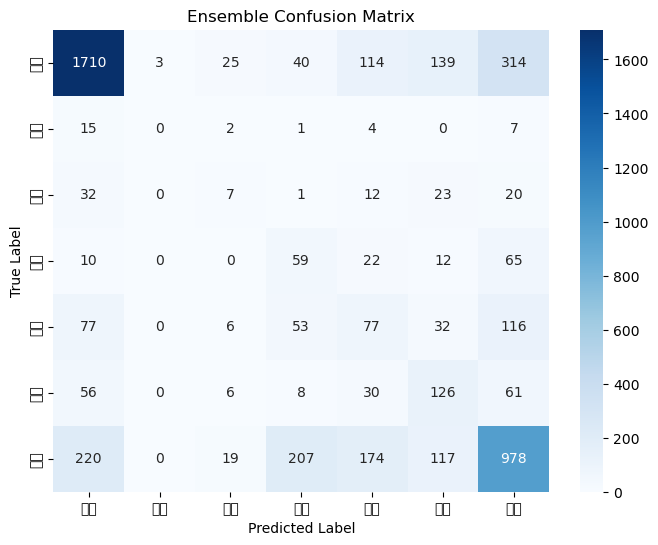

              precision    recall  f1-score   support

          Î∂ÑÎÖ∏       0.81      0.73      0.77      2345
          ÌòêÏò§       0.00      0.00      0.00        29
          Í≥µÌè¨       0.11      0.07      0.09        95
          Í∏∞ÏÅ®       0.16      0.35      0.22       168
          Ïä¨Ìîî       0.18      0.21      0.19       361
          ÎÜÄÎûå       0.28      0.44      0.34       287
          Ï§ëÎ¶Ω       0.63      0.57      0.60      1715

    accuracy                           0.59      5000
   macro avg       0.31      0.34      0.32      5000
weighted avg       0.63      0.59      0.61      5000



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ‚úÖ Í∞Å Î™®Îç∏ ÏòàÏ∏°Í∞í ÏñªÍ∏∞ (ÏïôÏÉÅÎ∏î)
ensemble_predictions = np.zeros((len(X_test), 7))  # ÌÅ¥ÎûòÏä§Í∞Ä 7Í∞úÎùº Í∞ÄÏ†ï

# Î™®Îì† Î™®Îç∏ ÏòàÏ∏°Í∞í ÎàÑÏ†Å
for model in ensemble_models:
    ensemble_predictions += model.predict(X_test)

# ‚úÖ ÏïôÏÉÅÎ∏î ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞ (Soft Voting: ÌôïÎ•†Í∞í ÌèâÍ∑† ÌõÑ ÏµúÏ¢Ö ÌÅ¥ÎûòÏä§ ÏÑ†Ï†ï)
ensemble_predictions /= len(ensemble_models)
y_pred_classes = np.argmax(ensemble_predictions, axis=1)

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®
y_true = y_test  # Ïù¥ÎØ∏ numpy array ÌòïÌÉúÎùºÎ©¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ Îê®

# ‚úÖ FER2013 Í∏∞Ï§Ä class_labels ÏÑ§Ï†ï
class_labels = ["Î∂ÑÎÖ∏", "ÌòêÏò§", "Í≥µÌè¨", "Í∏∞ÏÅ®", "Ïä¨Ìîî", "ÎÜÄÎûå", "Ï§ëÎ¶Ω"]

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Ensemble Confusion Matrix")
plt.show()

# ‚úÖ Ï∂îÍ∞Ä ÌèâÍ∞Ä Î≥¥Í≥†ÏÑú Ï∂úÎ†• (Precision, Recall, F1-score ÌôïÏù∏)
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)

Matthews Correlation Coefficient (MCC): 0.3912
Cohen's Kappa Score: 0.3808


/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54800 (\N{HANGUL SYLLABLE HYEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/mambaforge/bas

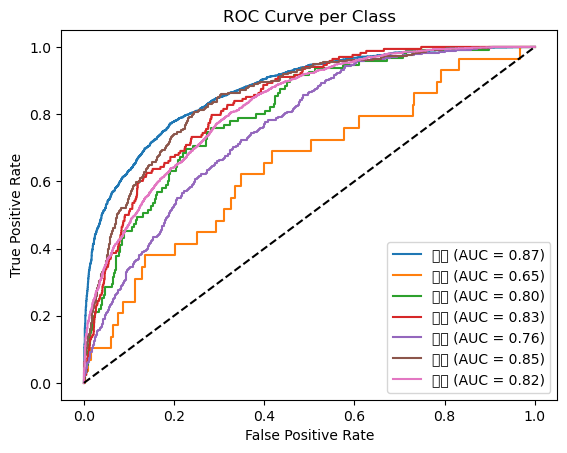

In [44]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Í∏∞Ï°¥Ïóê Ï†ïÏùòÎêú Î≥ÄÏàò: y_true, y_pred_classes, ensemble_predictions
class_labels = ["Î∂ÑÎÖ∏", "ÌòêÏò§", "Í≥µÌè¨", "Í∏∞ÏÅ®", "Ïä¨Ìîî", "ÎÜÄÎûå", "Ï§ëÎ¶Ω"]

# 1Ô∏è‚É£ Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_true, y_pred_classes)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# 2Ô∏è‚É£ Cohen's Kappa Score
kappa = cohen_kappa_score(y_true, y_pred_classes)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# 3Ô∏è‚É£ ROC Curve & AUC (ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÌôïÏù∏)
y_true_bin = label_binarize(y_true, classes=[0,1,2,3,4,5,6])

# ÌÅ¥ÎûòÏä§Î≥Ñ ROC Î∞è AUC Í≥ÑÏÇ∞
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], ensemble_predictions[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend(loc='lower right')
plt.show()

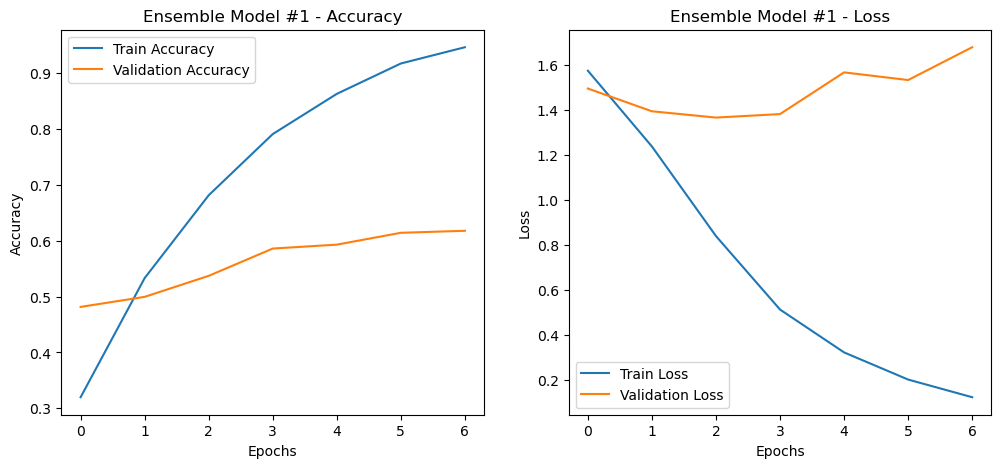

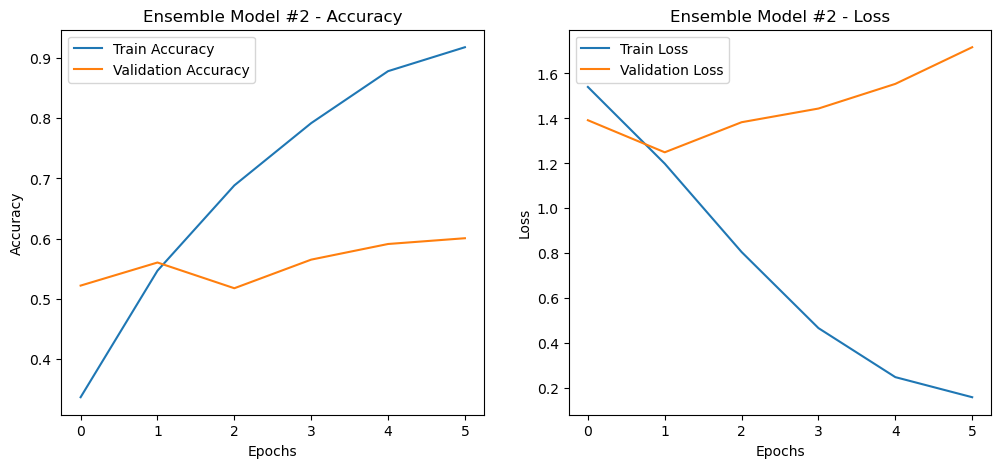

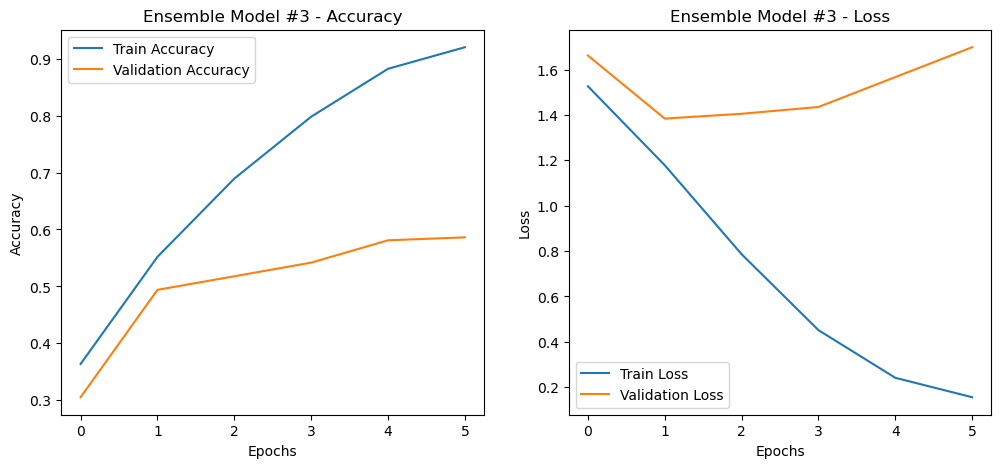

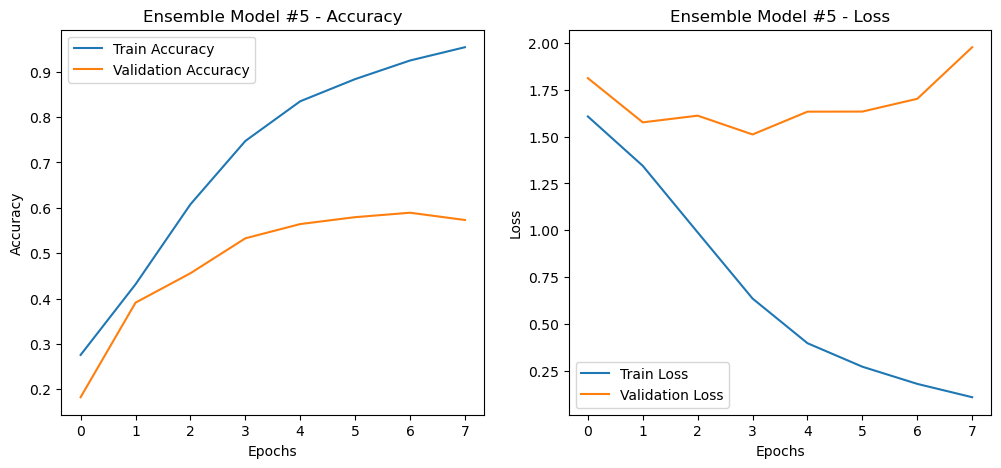

In [67]:
import matplotlib.pyplot as plt

# ‚úÖ ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_training_history(history, title="Model Training History"):
    plt.figure(figsize=(12, 5))

    # üîπ Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    # üîπ ÏÜêÏã§ Í∑∏ÎûòÌîÑ
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.show()

# ‚úÖ Î™®Îì† ÏïôÏÉÅÎ∏î Î™®Îç∏Ïùò ÌïôÏäµ Í≤∞Í≥ºÎ•º Ìïú Î≤àÏóê ÏãúÍ∞ÅÌôî
for idx, history in enumerate(histories):
    plot_training_history(history, f"Ensemble Model #{idx+1}")